# 1. Import thư viện

In [1]:
# install opencv
!pip install opencv-python
!pip install opencv-contrib-python

In [2]:
# install wget
!pip install wget

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# !python -m wget http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/Lenna.jpg

In [5]:
# !python -m wget https://upload.wikimedia.org/wikipedia/en/6/62/Main_characters_of_One_Piece.png

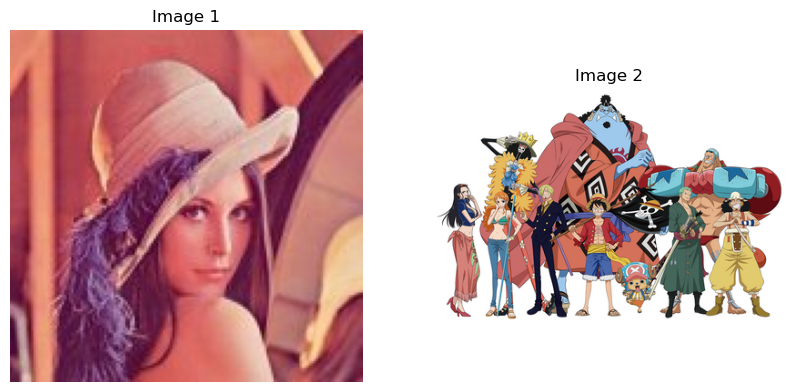

In [6]:
# cv2.IMREAD_COLOR sẽ được giải mã theo thứ tự B G R.
image1 = cv2.imread('Lenna.jpg',  cv2.IMREAD_COLOR)
image2 = cv2.imread('Main_characters_of_One_Piece.png')
# sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# hiện thị 2 ảnh
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image1);
ax[0].axis('off');
ax[0].set_title('Image 1')
ax[1].imshow(image2);
ax[1].axis('off');
ax[1].set_title('Image 2');

In [7]:
def VisualizationImage(image, new_image, is_gray = False):
    '''
    Mục đích: Vẽ ảnh ban đầu và ảnh mới, để dễ dàng nhìn thấy sự biến đổi
    Tham số: 
        image: ảnh ban đầu
        new_image: ảnh mới
        is_gray: Có phải ảnh xám hay không.
    Return:
        None
    '''
    # Tạo figure và 2 axes trên 1 hàng để vẽ ảnh ban đầu và ảnh sau phép biến đổi
    fig, ax = plt.subplots(1,2,figsize = (8,4))
    # Hiện thị ảnh ban đầu
    if is_gray: # Nếu là ảnh grayscale thì dùng cmap ='gray' để chuyển màu. 
        ax[0].imshow(image,cmap = 'gray') 
    else:
        ax[0].imshow(image)
    ax[0].set_title('Original Image') # Đặt title cho ảnh
    ax[0].axis('off') # Bỏ 2 trục Ox, Oy cho dễ nhìn
    # Hiện thị ảnh mới
    if is_gray:
        ax[1].imshow(new_image,cmap = 'gray')
    else:
        ax[1].imshow(new_image)
    ax[1].set_title('New Image')
    ax[1].axis('off')

# 2. Giải thuật biến đổi màu

## 2.1 Phép biến đổi tuyến tính

**a) Tự cài đặt**

In [8]:
def linear(image, a=1, b=0):
    '''
    Mục đích: Thay đổi độ sáng của ảnh bằng phép biến đổi tuyến tính
    Tham số:
    - image: ảnh RGB
    - a: hệ số thay đổi độ tương phản
    - b: hệ số thay đổi độ sáng
    Return: ảnh sau khi đã thay đổi màu
    '''
    # Kích thước 2 chiều đầu tiên của image
    m,n = image.shape[:2]
    # Tạo ảnh mới có kích thức giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image,dtype = float)
    # Tính toán giá trị pixel cho ảnh mới
    new_image = a*image + b
    # Giá trị pixel mới mà nhỏ hơn 0 thì ta gán về 0, lớn hơn 255 thì ta gán về 255
    new_image[new_image<0] = 0
    new_image[new_image>255] =255
    return new_image.astype(int)

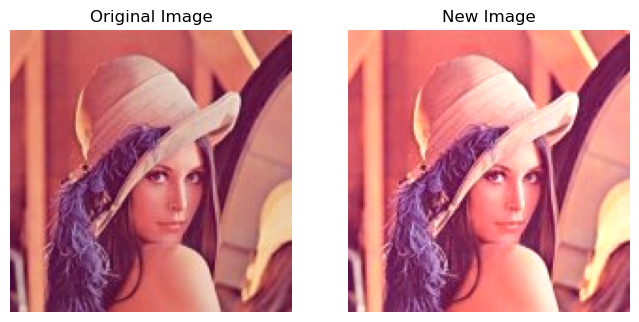

In [9]:
new_image = linear(image1, 1.2, 5)
# hiện thị ảnh
VisualizationImage(image1, new_image)

**b) Dùng thư viện opencv**

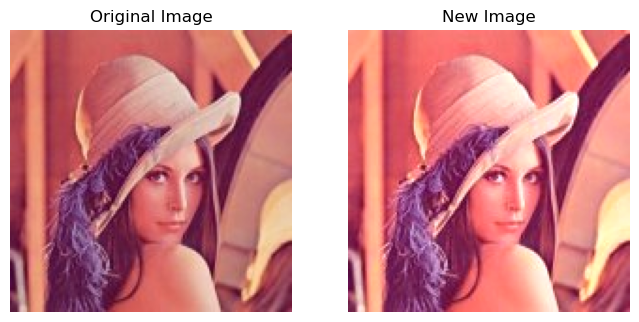

In [10]:
# Thay đổi độ tương phản
new_image = cv2.addWeighted(image1,1.2, 1,5, 0) # alpha = 1.2, beta = 5
# Hiện thị hình ảnh
VisualizationImage(image1, new_image)

## 2.2) Phép biến đổi phi tuyến

**a) Tự cài đặt**

In [11]:
def non_linear_logarithm(image, c):
    '''
    Mục đích: Thay đổi độ sáng của ảnh bằng phép biến đổi theo hàm log
    Tham số:
      image: ảnh RGB
      c: hệ số
    Return: ảnh sau khi đã thay đổi độ sáng
    '''
    # Kích thước 2 chiều đầu tiên của image
    m,n = image.shape[:2]
    # Tạo ảnh mới có kích thức giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image)
    # Thay các pixel = 0 bằng 0.00001 vì log(0) sẽ ra lỗi
    image = image.astype(float)
    image[image==0] = 0.00001
    # Tính toán các giá trị pixel mới
    new_image = c*np.log(image)
    # Giá trị pixel mới mà nhỏ hơn 0 thì ta gán về 0, lớn hơn 255 thì ta gán về 255
    new_image[new_image<0] = 0
    new_image[new_image>255] =255
    return new_image.astype(int)

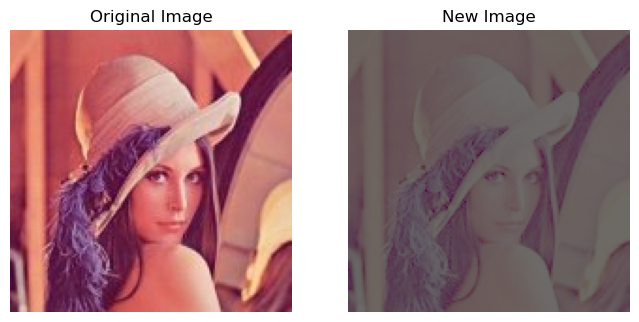

In [12]:
new_image = non_linear_logarithm(image1,20)
# hiện thị ảnh
VisualizationImage(image1, new_image)

In [13]:
def non_linear_e_pow(image,c):
    '''
    Mục đích: Thay đổi độ sáng của ảnh bằng phép biến đổi theo hàm mũ
    Tham số:
      image: ảnh RGB
      c: hệ số
    Return: ảnh sau khi đã thay đổi độ sáng
    '''
    # Kích thước 2 chiều đầu tiên của image
    m,n = image.shape[:2]
    # Tạo ảnh mới có kích thức giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image).astype(float)
    # chuyển type của image từ int sang float để không bị lỗi
    image = image.astype(float)
    # Tính toán giá trị pixel mới
    new_image = c*np.exp(image)
    # Giá trị pixel mới mà lớn hơn 255 thì ta gán về 255
    new_image[new_image>255] = 255
    return new_image.astype(int)

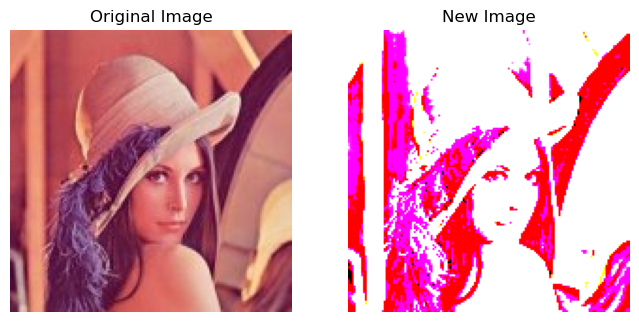

In [14]:
new_image = non_linear_e_pow(image1,1e-30)
# hiện thị ảnh
VisualizationImage(image1,new_image)

**b) Dùng thư viện opencv**

## 2.3)  Phép cân bằng lược đồ xám

**a) Tự cài đặt**

In [15]:
def rgbtograyscale(image):
    '''
    Mục đích: Chuyển ảnh RGB sang ảnh grayscale
    Tham số: 
      - image: ảnh RGB
    Trả về: Ảnh grayscale
    '''
    return np.dot(image[...,:3],[0.299,0.587,0.114]).astype(int)

In [16]:
def histogram_equalization(gray_image):
    '''
    Mục đích: chuyển đổi màu bằng phép cân bằng lược đồ xám
    Tham số: 
      - image: ảnh xám
    Trả về: 
        new_image: ảnh sau khi chuyển màu.
        n_G: số mức xám
    '''
    # Số mức xám của ảnh
    n_G = np.max(gray_image)+1
    # Kích thước ảnh
    m,n = gray_image.shape
    # Tính lược đồ xám của ảnh
    H = np.histogram(gray_image,bins = n_G,range = (0,n_G))[0]
    # Tính lược đồ xám tính lũy của ảnh và chuẩn hóa về đoạn [0;n_G-1]
    T = np.cumsum(H)
    T = np.around((n_G-1)/(m*n)*T)
    # Ảnh mới
    new_image = T[gray_image]
    return new_image, n_G

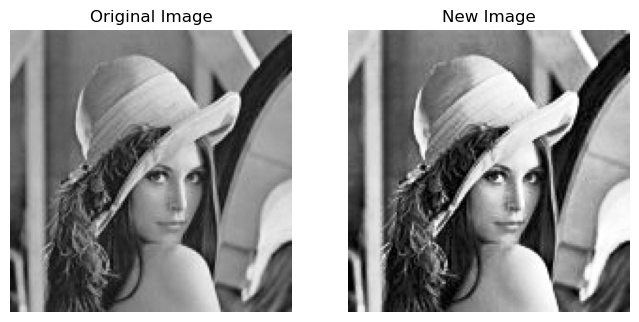

In [17]:
gray_image1 = rgbtograyscale(image1)
new_image, n_G = histogram_equalization(gray_image1)
# hiện thị ảnh
VisualizationImage(gray_image1,new_image,is_gray=True)

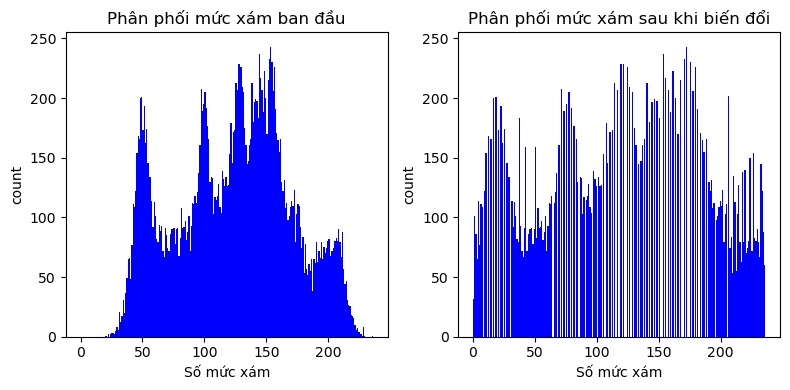

In [18]:
# Tạo figure và 2 axes để vẽ biểu đồ phân phối mức xám ban đầu và sau khi biển đổi
fig, ax = plt.subplots(1,2,figsize = (8,4))
#
ax[0].hist(gray_image1.flatten(),n_G,[0,n_G], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh ban đầu
ax[0].set_title('Phân phối mức xám ban đầu') # Đặt title
ax[0].set_xlabel('Số mức xám') # Tên trên Ox
ax[0].set_ylabel('count') # Tên trục Oy
#
ax[1].hist(new_image.flatten(),n_G,[0,n_G], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh sau khi biến đổi
ax[1].set_title('Phân phối mức xám sau khi biến đổi') # Đặt title
ax[1].set_xlabel('Số mức xám') # Tên trên Ox
ax[1].set_ylabel('count') # Tên trục Oy
# Hiển thị ảnh ảnh
plt.tight_layout() # dãn đều 2 biểu đồ
plt.show()

**b) Dùng thư viện opencv**

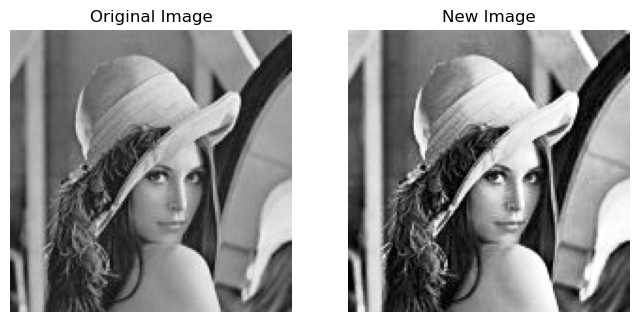

In [19]:
image = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(image)
# hiện thị ảnh
VisualizationImage(image, new_image,is_gray=True)

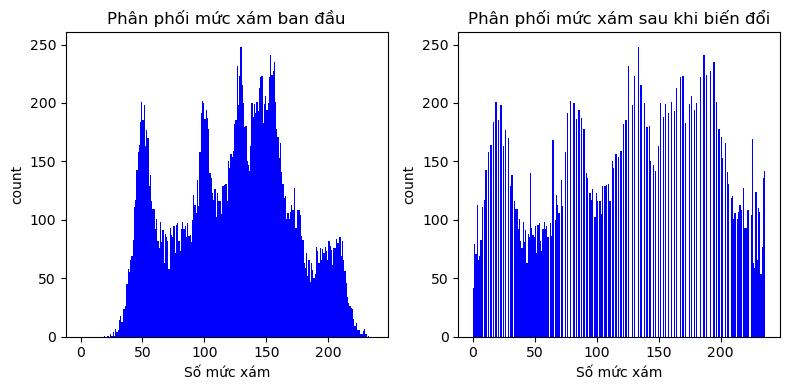

In [20]:
# Tạo figure và 2 axes để vẽ biểu đồ phân phối mức xám ban đầu và sau khi biển đổi
fig, ax = plt.subplots(1,2,figsize = (8,4))
#
ax[0].hist(image.flatten(),n_G,[0,n_G], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh ban đầu
ax[0].set_title('Phân phối mức xám ban đầu') # Đặt title
ax[0].set_xlabel('Số mức xám') # Tên trên Ox
ax[0].set_ylabel('count') # Tên trục Oy
#
ax[1].hist(new_image.flatten(),n_G,[0,n_G], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh sau khi biến đổi
ax[1].set_title('Phân phối mức xám sau khi biến đổi') # Đặt title
ax[1].set_xlabel('Số mức xám') # Tên trên Ox
ax[1].set_ylabel('count') # Tên trục Oy
# Hiển thị ảnh ảnh
plt.tight_layout() # dãn đều 2 biểu đồ
plt.show()

## 2.4 Đặc tả lược đồ xám

**a) Tự cài đặt**

In [21]:
def mapping(value,hist):
    # Kiểm tra xem value có nằm trong hist2 không
    pos = np.where(hist==value)[0]
    # Có nằm trong hist2 thì trả về vị trí của nó trong hist2
    if len(pos)>0: 
        return pos[0]
    # Không nằm trong hist2 thì trả về vị trí của số gần nhất với value
    else:
        # Tìm chỉ số của khoảng mà giá trị a thuộc về
        interval_index = np.digitize(value, hist)
        # Xác định khoảng tương ứng
        interval = np.array([hist[interval_index - 1], hist[interval_index]])
        return interval[np.argmin(np.abs(interval-value))]

In [22]:
def histogram_specification(original, specified):
    '''
    Mục đích: chuyển đổi màu bằng phép đặc tả lược đồ xám
    Tham số: 
      - original: ảnh muốn biến đổi màu(ảnh 1)
      - specified: ảnh được tham chiếu(ảnh 2)
    Trả về: 
        new_image: ảnh sau khi biến đổi màu.
        n_G1: số mức xám của ảnh 1
        n_G2: số mức xám của ảnh 2
    '''
    m1, n1 = original.shape # Kích thước của ảnh 1
    m2, n2 = specified.shape # Kích thước của ảnh 2
    n_G1 = np.max(original) + 1 # Số mức xám của ảnh 1
    n_G2 = np.max(specified) + 1 # Số mức xám của ảnh 2
    # Tính lược đồ xám của ảnh 1
    H1 = np.histogram(original,bins = n_G1,range = (0,n_G1))[0]
    # Tính lược đồ xám tính lũy của ảnh 1 và chuẩn hóa về đoạn [0;n_G1-1]
    T1 = np.cumsum(H1)
    T1 = np.around((n_G1-1)/(m1*n1)*T1)
    # Tính lược đồ xám ảnh 1
    H2 = np.histogram(specified,bins = n_G2,range = (0,n_G2))[0]
    # Tính lược đồ xám tính lũy cho ảnh 2 và chuẩn hóa về đoạn [0;n_G2-1]
    T2 = np.cumsum(H2)
    T2 = np.around((n_G2-1)/(m2*n2)*T2)
    # Tạo lược đồ xám tích lũy mới cho ảnh 1 dựa trên T2
    new_hist = np.zeros(n_G1)
    for i in range(n_G1):
        new_hist[i] = mapping(T1[i],T2)
    new_image = new_hist[gray_image1]
    return new_image, n_G1, n_G2

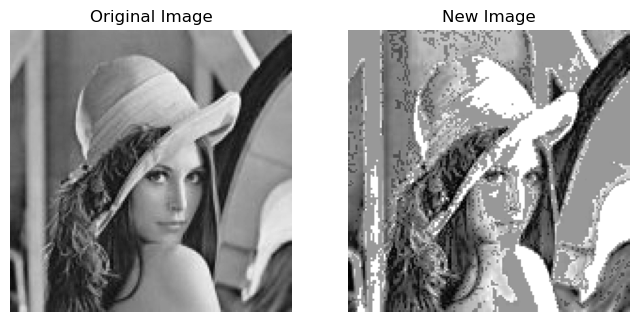

In [23]:
gray_image1 = rgbtograyscale(image1)
gray_image2 = rgbtograyscale(image2)
new_image,n_G1,n_G2 = histogram_specification(gray_image1, gray_image2)
# hiện thị ảnh
VisualizationImage(gray_image1,new_image,is_gray=True)

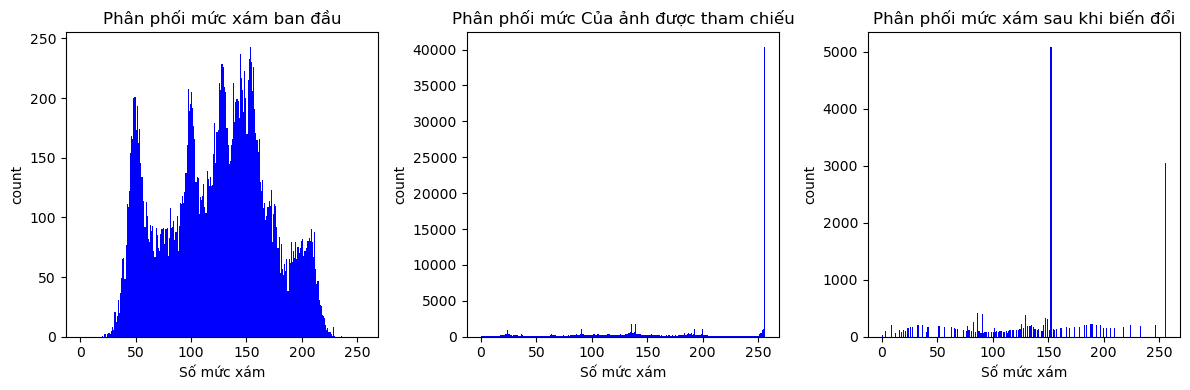

In [24]:
# Tạo figure và 3 axes để vẽ biểu đồ phân phối mức xám ảnh 1, ảnh 2 và ảnh 1 sau khi biển đổi.
fig, ax = plt.subplots(1,3,figsize = (12,4))
#
ax[0].hist(gray_image1.flatten(),256,[0,256], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh 1
ax[0].set_title('Phân phối mức xám ban đầu') # Đặt title
ax[0].set_xlabel('Số mức xám') # Tên trên Ox
ax[0].set_ylabel('count') # Tên trục Oy
#
ax[1].hist(gray_image2.flatten(),256,[0,256], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh 2
ax[1].set_title('Phân phối mức Của ảnh được tham chiếu') # Đặt title
ax[1].set_xlabel('Số mức xám') # Tên trên Ox
ax[1].set_ylabel('count') # Tên trục Oy
#
ax[2].hist(new_image.flatten(),256,[0,256], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh 1 sau biến đổi
ax[2].set_title('Phân phối mức xám sau khi biến đổi') # Đặt title
ax[2].set_xlabel('Số mức xám') # Tên trên Ox
ax[2].set_ylabel('count') # Tên trục Oy
# Hiện thị ảnh
plt.tight_layout() # Cách đều các biểu đồ ra để dễ nhìn
plt.show()

**b) Dùng thư viện**

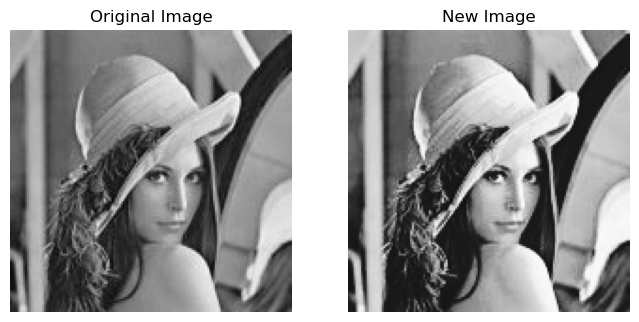

In [25]:
# Đọc ảnh nguồn và ảnh đích
source_image = cv2.imread('Lenna.jpg',cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('Main_characters_of_One_Piece.png',cv2.IMREAD_GRAYSCALE)

# Tính toán histogram cho ảnh nguồn và ảnh đích
source_histogram = cv2.calcHist([source_image], [0], None, [256], [0, 256])
target_histogram = cv2.calcHist([target_image], [0], None, [256], [0, 256])

# Chuẩn hóa histogram
source_histogram /= source_histogram.sum()
target_histogram /= target_histogram.sum()

# Tính lược đồ xám tính lũy
cdf_ref = source_histogram.cumsum()
cdf_input = target_histogram.cumsum()

# Map the pixel
mapping = np.interp(cdf_input, cdf_ref, np.arange(256))

# Dùng đặc tả lược đồ xám để biến đổi màu ảnh nguồn
transformed_image = cv2.LUT(source_image, mapping.astype(np.uint8))
# Hiện thị ảnh
VisualizationImage(source_image, transformed_image,is_gray=True)

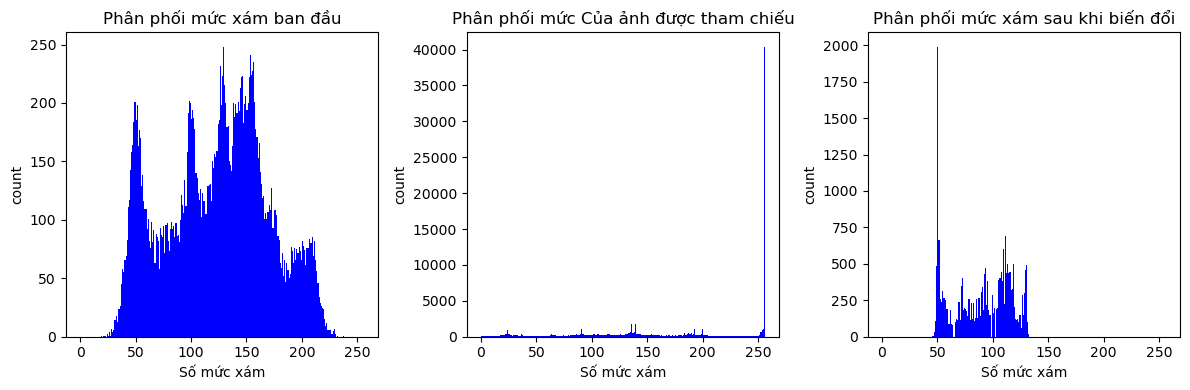

In [26]:
# Tạo figure và 3 axes để vẽ biểu đồ phân phối mức xám ảnh 1, ảnh 2 và ảnh 1 sau khi biển đổi.
fig, ax = plt.subplots(1,3,figsize = (12,4))
#
ax[0].hist(source_image.flatten(),256,[0,256], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh 1
ax[0].set_title('Phân phối mức xám ban đầu') # Đặt title
ax[0].set_xlabel('Số mức xám') # Tên trên Ox
ax[0].set_ylabel('count') # Tên trục Oy
#
ax[1].hist(target_image.flatten(),256,[0,256], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh 2
ax[1].set_title('Phân phối mức Của ảnh được tham chiếu') # Đặt title
ax[1].set_xlabel('Số mức xám') # Tên trên Ox
ax[1].set_ylabel('count') # Tên trục Oy
#
ax[2].hist(transformed_image.flatten(),256,[0,256], color = 'blue') # Vẽ biểu đồ phân phối mức xám của ảnh 1 sau biến đổi
ax[2].set_title('Phân phối mức xám sau khi biến đổi') # Đặt title
ax[2].set_xlabel('Số mức xám') # Tên trên Ox
ax[2].set_ylabel('count') # Tên trục Oy
# Hiện thị ảnh
plt.tight_layout() # Cách đều các biểu đồ ra để dễ nhìn
plt.show()

# 3. Giải thuật biến đổi hình học

## 3.1) Phép co giãn

**a) Tự cài đặt**

In [27]:
def nearest_neighbor_scale(image, S_x, S_y):
    '''
    Mục đích: co giãn ảnh với tỷ lệ S_x và S_y tâm O(0,0) - Phép nội suy màu hàng xóm gần nhất.
    Tham số: 
        image: ảnh RGB
        S_x, S_y: là tỷ lệ scale theo trục Ox và Oy.
    Return: Ảnh sau khi co giãn.
    '''
    # Kích thước 2 chiều đầu tiên của ảnh
    m, n = image.shape[:2]
    # Kích thước mới sau khi scale, dùng round để làm tròn vì scale có thể là float
    new_m, new_n = round(S_x*m), round(S_y*n)
    # Tạo ảnh mới có kích thước (new_m,new_n,3) với giá trị các pixel đều bằng 0.
    new_image = np.zeros((new_m,new_n,3),dtype = int)
    # Gán giá trị pixel vô new_image
    for i in range(new_m):
        for j in range(new_n):
            # Dùng round để làm tròn x,y (khi x == m or y == n thì dùng math.floor để làm tròn nếu không sẽ bị tràn số)
            x = round(i/S_x)
            y = round(j/S_y)
            if x==m:
                x = math.floor(i/S_x)
            if y==n:
                y = math.floor(j/S_y)
            new_image[i][j] = image[x][y]
    return new_image

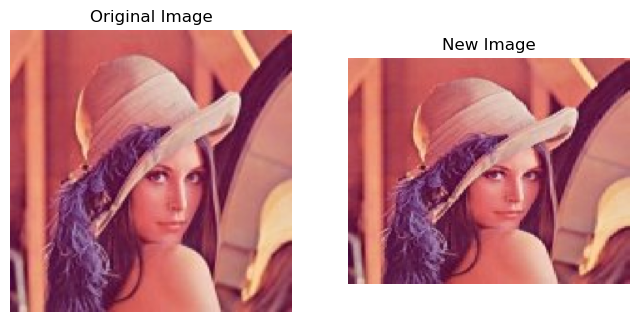

In [28]:
new_image = nearest_neighbor_scale(image1,3.2,4)
# hiện thị ảnh
VisualizationImage(image1, new_image)

In [29]:
def linear_interpolation(image,S_x, S_y):
    '''
    Mục đích: co giãn ảnh với tỷ lệ S_x và S_y tâm O(0,0) - Phép nội suy màu tuyến tính.
    Tham số: 
        image: ảnh RGB
        S_x, S_y: là tỷ lệ scale theo trục Ox và Oy.
    Return: Ảnh sau khi co giãn.
    '''
    # Kích thước 2 chiều đầu tiên của ảnh
    m, n = image.shape[:2]
    # Kích thước mới sau khi scale, dùng round để làm tròn vì scale có thể là float
    new_m, new_n = round(S_x*m), round(S_y*n)
    # Tạo ảnh mới có kích thước (new_m,new_n,3) với giá trị các pixel đều bằng 0.
    new_image = np.zeros((new_m,new_n,3),dtype = int)
    # Gán giá trị pixel theo công thức nội suy màu tuyến tính
    for i in range(new_m):
        for j in range(new_n):
            # Dùng round để làm tròn x,y (khi x == m or y == n thì dùng math.floor để làm tròn nếu không sẽ bị tràn số)
            x = i*1.0/S_x
            y = j*1.0/S_y
            l, k = round(x), round(y)
            if l==m:
                l = math.floor(i/S_x)
            if k==n:
                k = math.floor(j/S_y)
            # Áp dụng công thức nội suy màu tuyến tính
            a = x - l
            b = y -k
            if l == m - 1 and k == n-1:
                new_image[i][j] = (1-a)*(1-b)*image[l][k]
            elif l == m - 1:
                new_image[i][j] = (1-a)*(1-b)*image[l][k] + b*(1-a)*image[l][k+1]
            elif k == n - 1:
                new_image[i][j] = (1-a)*(1-b)*image[l][k] + a*(1-b)*image[l+1,k]
            else:
                new_image[i][j] = (1-a)*(1-b)*image[l][k] + a*(1-b)*image[l+1,k]+ b*(1-a)*image[l][k+1] + a*b*image[l+1][k+1]
    # Giá trị pixel mới mà nhỏ hơn 0 thì ta gán về 0, lớn hơn 255 thì ta gán về 255
    new_image[new_image>255] = 255
    new_image[new_image<0] = 0
    return new_image.astype(int)

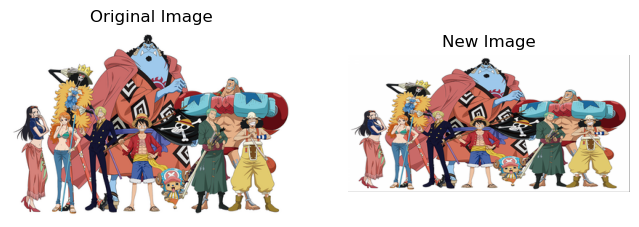

In [30]:
new_image = linear_interpolation(image2,2.2,3)
# hiện thị ảnh
VisualizationImage(image2, new_image)

## 3.2) Phép Quay

**a) Tự cài đặt**

In [31]:
# Phép quay quanh tâm của ảnh, góc quay alpha
def rotate(image, alpha):
    '''
    Mục đích: Quay ảnh quay tâm 1 góc alpha
    Tham số:
        - image: ảnh RGB
        - alpha: góc quay
    Trả về:
        - Ảnh sau khi quay
    '''
    # Kích thước 2 chiều đầu tiên của ảnh
    m, n = image.shape[:2]
    # Tạo ảnh mới có kích thước giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image)
    # Dùng công thức khi quay để gán giá trị pixel.
    for i in range(m):
        for j in range(n):
            x = math.floor(i*np.cos(alpha) + j*np.sin(alpha))
            y = math.floor(-i*np.sin(alpha) + j*np.cos(alpha))
            new_image[i][j] = image[x][y]
    return new_image

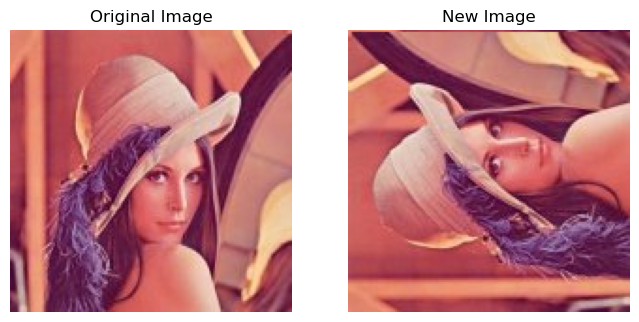

In [32]:
new_image = rotate(image1,np.pi/2)
# hiện thị ảnh
VisualizationImage(image1,new_image)

# 4. Giải thuật làm trơn ảnh

## 4.1 Lọc trung bình

**a) Tự cài đặt**

In [33]:
def mean_blur(image, filter_size):
    '''
    Mục đích: Làm trơn ảnh bằng lọc trung bình
    Tham số: 
        - image: ảnh RGB
        - filter_size: đồ dài 1 chiều của filter.
    '''
    # Kích thước 2 chiều đầu tiên của ảnh
    m, n = image.shape[:2]
    # Tạo ảnh mới có kích thước giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image)
    # Kích thước padding
    pad_size = (filter_size - 1)//2
    # Padding 2 chiều đầu tiên với value = 0
    pad_width = ((pad_size, pad_size), (pad_size, pad_size), (0, 0))
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    # Gán giá trị pixel vào new_image
    for i in range(pad_size, m+pad_size):
        for j in range(pad_size, n+pad_size):
            # Lấy các phần tử trong filter, phần tử đang xét nằm ở giữa
            neighbor = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1, :]
            # Tính trung bình giá các phần tử trong filter và gán giá trị vào new_image
            new_image[i-pad_size,j-pad_size,:] = np.mean(neighbor, axis = (0,1))
    return new_image

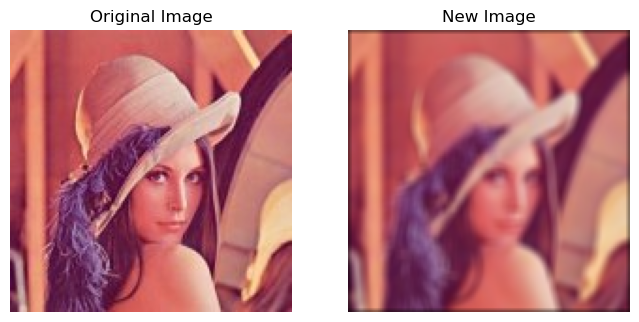

In [34]:
new_image = mean_blur(image1,5)
# hiện thị ảnh
VisualizationImage(image1, new_image)

**b) Dùng thư viện**

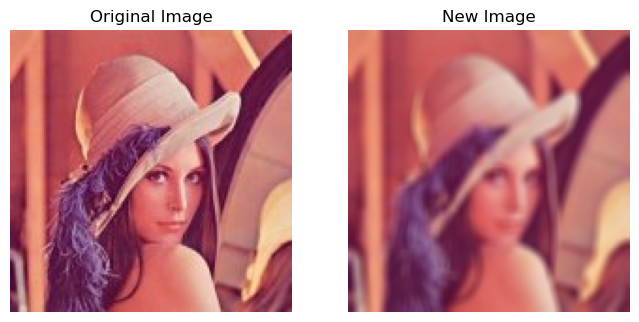

In [35]:
blurred_image = cv2.blur(image1, ksize = (5,5))
VisualizationImage(image1,blurred_image)

## 4.2 Lọc Gaus

**a) Tự cài đặt**

In [36]:
def gaussian_filter(filter_size, sigma):
    '''
    Mục đích: Tính gaussian filter
    Tham số:
        - filter_size: kích thước filter
        - sigma: hệ số trong công thức gaussian
    Trả về:
        gaussian filter
    '''
    # Tạo gaussian_filter có kích thước (filter_size,filter_size) với value = 0.
    gaus_filter = np.zeros((filter_size,filter_size))
    # Khoảng giá trị mà gaussian lấy là (-bound,bound)
    bound = (filter_size-1)//2
    for x in range(-bound,bound+1):
        for y in range(-bound,bound+1):
            gaus_filter[x+bound][y+bound] = (1/(2*np.pi*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    return gaus_filter

In [37]:
def gaussian_blur(image, filter_size, sigma):
    '''
    Mục đích: Làm trơn ảnh dựa bằng lọc gaussian
    Tham số:
        image: ảnh RGB
        filter_size: kích thước filter
        sigma: hệ số trong công thức gaussian
    Trả về:
        Ảnh sau khi được làm trơn
    '''
    # Kích thước 2 chiều đầu tiên của ảnh
    m, n = image.shape[:2]
    # Tạo ảnh mới có kích thước giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image)
    # Tạo gaussian filter dựa trên filter_size và sigma
    gaus_filter = gaussian_filter(filter_size,sigma)
    # Kích thước padding
    pad_size = (filter_size - 1)//2
    # Padding 2 chiều đầu tiên với value = 0
    pad_width = ((pad_size, pad_size), (pad_size, pad_size), (0, 0))
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    # Gán giá trị pixel vào new_image
    for x in range(pad_size, m+pad_size):
        for y in range(pad_size, n+pad_size):
            # Lấy các phần tử trong filter, phần tử đang xét nằm ở giữa
            neighbor = padded_image[x - pad_size:x + pad_size + 1, y - pad_size:y + pad_size + 1, :]
            # Tích các phần tử với các trọng số trong gaussian filter, sau đó cộng các kết quả lại
            new_image[x-pad_size,y-pad_size,:] = np.sum(gaus_filter[:,:,np.newaxis]*neighbor,axis = (0,1))
    return new_image.astype(int)

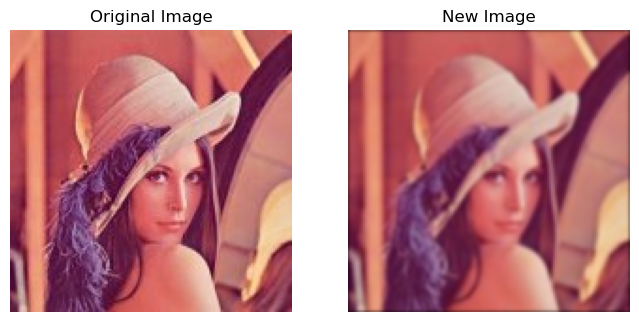

In [38]:
new_image = gaussian_blur(image1,5,1)
# hiện thị ảnh
VisualizationImage(image1, new_image,is_gray=True)

**b) Dùng thư viện**

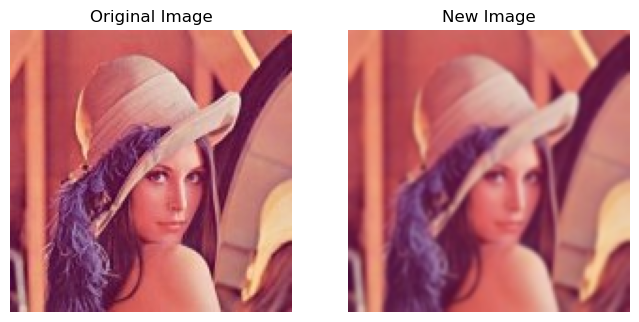

In [39]:
new_image = cv2.GaussianBlur(image1, (5, 5), 1)
# Hiện thị ảnh
VisualizationImage(image1, new_image)

## 4.3 Lọc trung vị

**a) Tự cài đặt**

In [40]:
def median_filter(image,filter_size):
    '''
    Mục đích: Làm trơn ảnh bằng lọc trung vị
    Tham số:
        - image: ảnh RGB
        - filter_size: kích thước filter
    Trả về:
        - ảnh sau khi lọc trung vị
    '''
    # Kích thước 2 chiều đầu tiên của ảnh
    m, n = image.shape[:2]
    # Tạo ảnh mới có kích thước giống ảnh ban đầu với giá trị các pixel đều bằng 0.
    new_image = np.zeros_like(image)
    # Kích thước padding
    pad_size = (filter_size - 1)//2
    # Padding 2 chiều đầu tiên với value = 0
    pad_width = ((pad_size, pad_size), (pad_size, pad_size), (0, 0))
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    # Gán giá trị pixel vào new_image
    for i in range(pad_size, m+pad_size):
        for j in range(pad_size, n+pad_size):
            # Lấy các phần tử trong filter, phần tử đang xét nằm ở giữa
            neighbor = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1, :]
            # Tìm phần tử trung vị trong filter và gán giá trị vào new_image
            new_image[i-pad_size,j-pad_size,:] = np.median(neighbor, axis = (0,1))
    return new_image

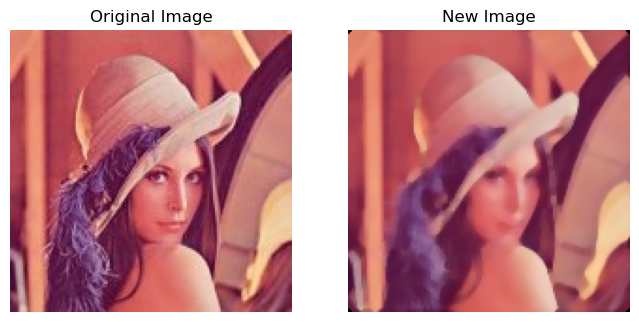

In [41]:
new_image = median_filter(image1, 5)
# Hiện thị ảnh
VisualizationImage(image1,new_image,is_gray=True)

**b) Dùng thư viện**

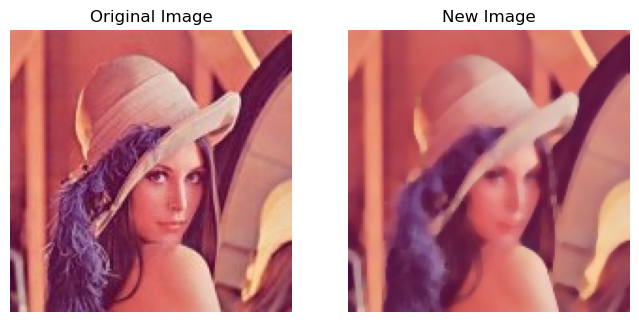

In [42]:
new_image = cv2.medianBlur(image1, 5)
# Hiện thị ảnh
VisualizationImage(image1, new_image)

# 5. Giải thuật phát hiện biên cạnh

## 5.1) Toán tử gradient

**a) Tự cài đặt**

In [43]:
def gradient_edge_detection(gray_image,kernel_x, kernel_y,threshold):
    '''
    Mục đích: phát hiện biên cạnh bằng gradient
    Tham số:
        - gray_image: ảnh grayscale
        - kernel_x, kernel_y: kernel theo x và y
        - threshold: ngưỡng để xem xét nó có phải là cạnh không
    Trả về:
        Ảnh biên cạnh
    '''
    # Kích thước của ảnh
    m, n = gray_image.shape
    # Tạo ảnh cường độ của vector gradient với value = 0
    e = np.zeros_like(gray_image)
    # Tạo binary edge image với value = 0
    BEI = np.zeros_like(gray_image)
    # kích thước kernel
    kernel_size = len(kernel_x)
    # Kích thước padding
    pad_size = (kernel_size - 1)//2
    # Padding với kích thước pad_size và value = 0
    pad_width = ((pad_size, pad_size), (pad_size, pad_size))
    padded_image = np.pad(gray_image, pad_width, mode='constant', constant_values=0)
    # Gán giá trị pixel vào e
    for x in range(pad_size,m+pad_size):
        for y in range(pad_size,n+pad_size):
            # Lấy các phần tử trong filter, phần tử đang xét nằm ở giữa
            neighbor = padded_image[x-pad_size:x+pad_size+1,y-pad_size:y+pad_size+1]
            # Tính ảnh cường độ
            f_x = np.sum(kernel_x*neighbor)
            f_y = np.sum(kernel_y*neighbor) 
            e[x-pad_size][y-pad_size] = np.sqrt(f_x**2+f_y**2)
    # Nếu cường độ vector gradient mà lớn hơn threshold thì đó là biên cạnh
    BEI[e>threshold] = 255
    return BEI

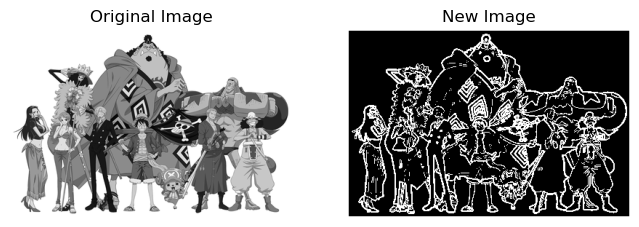

In [44]:
gray_image = rgbtograyscale(image2)
kernel_x = (1/4)*np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
kernel_y = (1/4)*np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
BEI = gradient_edge_detection(gray_image,kernel_x,kernel_y,50)
# hiện thị ảnh
VisualizationImage(gray_image,BEI,is_gray=True)

**b) Dùng thư viện**

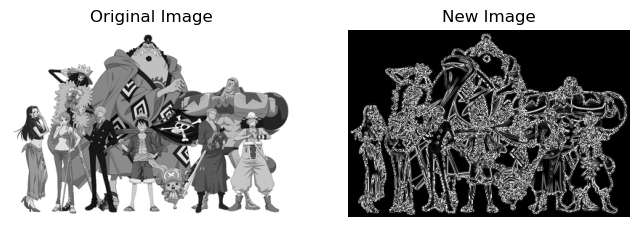

In [45]:
# Đọc ảnh grayscale
image = cv2.imread('Main_characters_of_One_Piece.png', cv2.IMREAD_GRAYSCALE)
# Áp dùng toán tử sobel với kích thước là 3
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# Tính toán vecto cường độ gradient
magnitude = np.sqrt(gradient_x**2 + gradient_y**2).astype(int)
magnitude = np.uint8(magnitude)
# Tính toán BEI
BEI = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)[1]
# hiện thị ảnh
VisualizationImage(image,magnitude,is_gray=True)

## 5.2) Toán tử Laplace

**a) Tự cài đặt**

In [46]:
def laplace_edge_detection(gray_image,laplace_filter, T):
    '''
    Mục đích: Phát hiện biên cạnh bằng Laplace
    Tham số:
        gray_image: ảnh grayscale
        laplace_filter: laplace kernel
        T: ngưỡng
    Trả về:
        binary edge image
    '''
    # Kích thước ảnh
    m, n = gray_image.shape
    # Khởi tạo ma trận lưu ảnh laplacian
    laplacian = np.zeros_like(gray_image)
    # Khởi tạo Binary Edge Image
    BEI = np.zeros_like(gray_image)
    # Kích thước padding
    pad_size = (len(kernel)-1)//2
    # Padding với kích thước pad_size và value = 0
    pad_width = ((pad_size,pad_size),(pad_size,pad_size))
    padded_image = np.pad(gray_image,pad_width,mode='constant', constant_values=0)
    # Gán giá trị pixel vào laplacian
    for x in range(pad_size,m+pad_size):
        for y in range(pad_size,n+pad_size):
            # Lấy các phần tử trong filter, phần tử đang xét nằm ở giữa
            neighbor = padded_image[x-pad_size:x+pad_size+1,y-pad_size:y+pad_size+1]
            # Tính giá trị của ảnh laplacian
            laplacian[x-pad_size][y-pad_size] = np.sum(neighbor*laplace_filter)
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            # Tìm điểm zero-crossing
            neighbors = [laplacian[i-1, j], laplacian[i+1, j], laplacian[i, j-1], laplacian[i, j+1]]
            if any(np.sign(laplacian[i, j]) != np.sign(neighbor) for neighbor in neighbors):
                # Nếu điểm đó là zero crossing thì dùng cửa số 3x3 để tính local variance.
                local_variance = np.var(gray_image[i-1:i+2, j-1:j+2])
                # Nếu local variance > T thì đó là biên cạnh
                if local_variance > T:
                    BEI[i, j] = 255
    return BEI

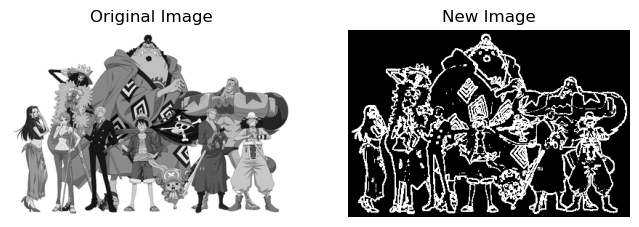

In [47]:
gray_image2 = rgbtograyscale(image2)
# kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
BEI = laplace_edge_detection(gray_image2,kernel,600)
# hiện thị ảnh
VisualizationImage(gray_image2,BEI,is_gray=True)

**b) Dùng thư viện**

In [ ]:
# Đọc ảnh grayscale
image = cv2.imread('Main_characters_of_One_Piece.png', cv2.IMREAD_GRAYSCALE)
# Tính toán ra ảnh Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)
# TÌm ảnh BEI
m, n = image.shape
T = 600
BEI = np.zeros_like(gray_image)
for i in range(1, m - 1):
    for j in range(1, n - 1):
        # Tìm điểm zero-crossing
        neighbors = [laplacian[i-1, j], laplacian[i+1, j], laplacian[i, j-1], laplacian[i, j+1]]
        if any(np.sign(laplacian[i, j]) != np.sign(neighbor) for neighbor in neighbors):
            # Nếu điểm đó là zero crossing thì dùng cửa số 3x3 để tính local variance.
            local_variance = np.var(gray_image[i-1:i+2, j-1:j+2])
            # Nếu local variance > T thì đó là biên cạnh
            if local_variance > T:
                BEI[i, j] = 255
# hiện thị ảnh
VisualizationImage(image, BEI,is_gray=True)

## 5.3) Toán tử Laplace of Gaussian

**a) Tự cài đặt**

In [ ]:
# Tính toán laplace of gaussian filter
def LoG(sigma,x,y):
    return -(1/(np.pi*sigma**4))*(1-(x**2 + y**2)/(2*sigma**2 ))*np.exp(-(x**2+y**2)/(2*sigma**2))
def LoG_discrete(n,sigma,scale):
    LoG_filter = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            LoG_filter[i,j] = np.round(LoG(sigma,(i-(n-1)/2),(j-(n-1)/2))*(-scale/LoG(sigma,0,0)))
    return LoG_filter

In [ ]:
def LoG_edge_detection(gray_image,LoG_filter,T):
    '''
    Mục đích: Phát hiện biên cạnh bằng Laplace
    Tham số:
        gray_image: ảnh grayscale
        kernel: laplace of gaussian kernel
        T: ngưỡng
    Trả về:
        ảnh biên cạnh
    '''
    # Kích thước ảnh
    m, n = gray_image.shape
    # Khởi tạo LoG
    LoG = np.zeros_like(gray_image)
    # Khởi tạo Binary Edge Image
    BEI = np.zeros_like(gray_image)
    # Kích thước padding
    pad_size = (len(LoG_filter)-1)//2
    # Padding với kích thước pad_size và value = 0
    pad_width = ((pad_size,pad_size),(pad_size,pad_size))
    padded_image = np.pad(gray_image,pad_width,mode='constant', constant_values=0)
    # Gán giá trị vào ảnh LoG
    for x in range(pad_size,m+pad_size):
        for y in range(pad_size,n+pad_size):
            # Lấy các phần tử trong filter, phần tử đang xét nằm ở giữa
            neighbor = padded_image[x-pad_size:x+pad_size+1,y-pad_size:y+pad_size+1]
            # Tính giá trị của ảnh LoG
            LoG[x-pad_size,y-pad_size] = np.sum(LoG_filter*neighbor,axis = (0,1))
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            # # Tìm điểm zero-crossing
            neighbors = [LoG[i-1, j], LoG[i+1, j], LoG[i, j-1], LoG[i, j+1]]
            if any(np.sign(LoG[i, j]) != np.sign(neighbor) for neighbor in neighbors):
                # Nếu điểm đó là zero crossing thì dùng cửa số 3x3 để tính local variance.
                local_variance = np.var(gray_image[i-1:i+2, j-1:j+2])
                # Nếu local variance > T thì đó là biên cạnh
                if local_variance > T:
                    BEI[i, j] = 255
    return BEI

In [ ]:
LoG_filter = LoG_discrete(19,1.5,40)
gray_image2 = rgbtograyscale(image2)
new_image = LoG_edge_detection(gray_image2,LoG_filter,500)
# Hiện thị ảnh
VisualizationImage(gray_image2, new_image, is_gray=True)

**b) Dùng thư viện**

In [ ]:
# Áp dụng LoG sử dụng OpenCV
sigma = 1.5
image = cv2.imread('Main_characters_of_One_Piece.png', cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
log_result = cv2.Laplacian(blurred_image, cv2.CV_64F)

# TÌm ảnh BEI
m, n = image.shape
T = 500
BEI = np.zeros_like(gray_image)
for i in range(1, m - 1):
    for j in range(1, n - 1):
        # Tìm điểm zero-crossing
        neighbors = [log_result[i-1, j], log_result[i+1, j], log_result[i, j-1], log_result[i, j+1]]
        if any(np.sign(laplacian[i, j]) != np.sign(neighbor) for neighbor in neighbors):
            # Nếu điểm đó là zero crossing thì dùng cửa số 3x3 để tính local variance.
            local_variance = np.var(gray_image[i-1:i+2, j-1:j+2])
            # Nếu local variance > T thì đó là biên cạnh
            if local_variance > T:
                BEI[i, j] = 255
# hiện thị ảnh
VisualizationImage(image, BEI,is_gray=True)

## 5.4) Phương pháp Canny

**a) Tự cài đặt**

In [ ]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    '''
    Mục đích: Dùng để làm mỏng cạnh trong phương pháp canny
    Tham số:
        gradient_magnitude: vector cường độ gradient
        gradient_direction: vector hướng gradient
    Trả về:
        Cạnh đã được làm mỏng
    '''
    # Kích thước gradient_magnitude và gradient direction
    height, width = gradient_magnitude.shape
    # Khởi tạo suppressed
    suppressed = np.zeros_like(gradient_magnitude)
    # Gán giá trị vào suppressed
    for i in range(1, height-1):
        for j in range(1, width-1):
            angle = gradient_direction[i, j]
            q, r = 255, 255
            # Tính toán theo các trục ngang, dọc và đường chéo.
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q, r = gradient_magnitude[i, j+1], gradient_magnitude[i, j-1]
            elif 22.5 <= angle < 67.5: 
                q, r = gradient_magnitude[i+1, j-1], gradient_magnitude[i-1, j+1]
            elif 67.5 <= angle < 112.5:
                q, r = gradient_magnitude[i+1, j], gradient_magnitude[i-1, j]
            elif 112.5 <= angle < 157.5:
                q, r = gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]
            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                suppressed[i, j] = gradient_magnitude[i, j]
            else:
                suppressed[i, j] = 0
    return suppressed

In [ ]:
def candy_edge_detection(gray_image, filter_size, sigma, gradient_x,gradient_y, lower_threshold, upper_threshold):
    '''
    Mục đích: phát hiện biên cạnh bằng phương pháp canny
    Tham số:
        - gray_image: ảnh grayscale
        - filter_size: kích thước gaussian filter
        - sigma: hệ số trong công thức tính gaussian filter
        - gradient_x, gradient_y: gradient theo trục Ox, Oy
        - lower_threshold, upper_threshod: ngưỡng dưới và ngưỡng trên
    '''
    # Kích thước ảnh
    m,n = gray_image.shape
    # Khởi tạo vector cường độ gradient
    magnitude = np.zeros_like(gray_image,'float')
    # Khởi tạo vector hướng gradient
    direction = np.zeros_like(gray_image,dtype = 'float')
    # Khởi tạo Binary Edge Image
    BEI = np.zeros_like(gray_image)
    # Áp dụng gaussian để làm trơn ảnh
    gray_image_blur = gaussian_blur(gray_image[:,:,np.newaxis],filter_size,sigma).squeeze()
    # Kích thước padding
    pad_size = (len(gradient_x) - 1)//2
    # Padding với kích thước pad_size và value = 0
    pad_width = [(pad_size,pad_size),(pad_size,pad_size)]
    padded_image = np.pad(gray_image_blur,pad_width,mode = 'constant', constant_values = 0)
    # Tính vector cường độ và vector hướng của gradient
    for x in range(pad_size,m + pad_size):
        for y in range(pad_size,n + pad_size):
            neighbor = padded_image[x-pad_size:x+pad_size+1,y-pad_size:y+pad_size+1]
            f_x = np.sum(kernel_x*neighbor)
            f_y = np.sum(kernel_y*neighbor)
            magnitude[x-pad_size][y-pad_size] = np.sqrt(f_x**2+f_y**2)
            direction[x-pad_size][y-pad_size] = np.arctan2(f_y,f_x)
    # Áp dụng non maximum suppression để làm mỏng cạnh
    suppressed = non_maximum_suppression(magnitude,direction)
    # Dùng 2 ngưỡng để quyết định điểm nào là biên cạnh
    strong_edges = suppressed>=upper_threshold # Lớn hơn ngưỡng trên là cạnh mạnh
    weak_edges = (suppressed>=lower_threshold) & (suppressed<upper_threshold) # Lớn hơn ngưỡng dưới là cạnh yếu
    # Nếu là cạnh yếu và xung quanh đó có cạnh mạnh thì cạnh yếu là cạnh.
    height, width = weak_edges.shape
    BEI = np.zeros_like(weak_edges)
    for i in range(1, height-1):
        for j in range(1,width-1):
            if weak_edges[i,j]and strong_edges[i-1:i+2,j-1:j+2].any():
                BEI[i,j] = 255
    BEI[strong_edges] = 255
    return BEI

In [ ]:
gray_image2 = rgbtograyscale(image2)
kernel_x = (1/4)*np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
kernel_y = (1/4)*np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
BEI = candy_edge_detection(gray_image2,5,1,kernel_x, kernel_y,70, 20)
# Hiện thị ảnh
VisualizationImage(gray_image2, BEI, is_gray = True)

**b) Dùng thư viện**

In [ ]:
# Đọc ảnh
image = cv2.imread('Main_characters_of_One_Piece.png', cv2.IMREAD_GRAYSCALE)

# Dùng gaussian để khử nhiễu
blurred = cv2.GaussianBlur(image, (5, 5), 1)

# Dùng canny
edges = cv2.Canny(blurred, 20, 70)

# Hiện thị ảnh
VisualizationImage(image, edges, is_gray=True)